In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
data = pd.read_csv('master.csv')

## let's get some basic information about this suicide dataset #

In [15]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


### As we can see below, there are 27820 instances, and each instance has 12 features(columns), they are listed as follow:

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


### let's check the head 10 insatnces first

In [17]:
data.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


### What about the 10 instances at the end of the dataset?
Everything seems Ok, and this dataset is clean enough without any outliers

In [18]:
data.tail(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27810,Uzbekistan,2014,female,15-24 years,347,2992817,11.59,Uzbekistan2014,0.675,"63,067,077,179",2309,Millenials
27811,Uzbekistan,2014,male,55-74 years,144,1271111,11.33,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers
27812,Uzbekistan,2014,male,15-24 years,347,3126905,11.10,Uzbekistan2014,0.675,"63,067,077,179",2309,Millenials
27813,Uzbekistan,2014,male,75+ years,17,224995,7.56,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27814,Uzbekistan,2014,female,25-34 years,162,2735238,5.92,Uzbekistan2014,0.675,"63,067,077,179",2309,Millenials
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


In [19]:
suic_sum = pd.DataFrame(data['suicides_no'].groupby(data['country']).sum()) #this dataframe only contains [country] and the sum of its work
suic_sum = suic_sum.reset_index().sort_index(by='suicides_no',ascending=False)

G:\anaconda3\envs\py3iaml\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


In [20]:
print('the total number of countries in the dataset is :',suic_sum.shape[0]) #so there are totally 101 countires in this dataset

the total number of countries in the dataset is : 101


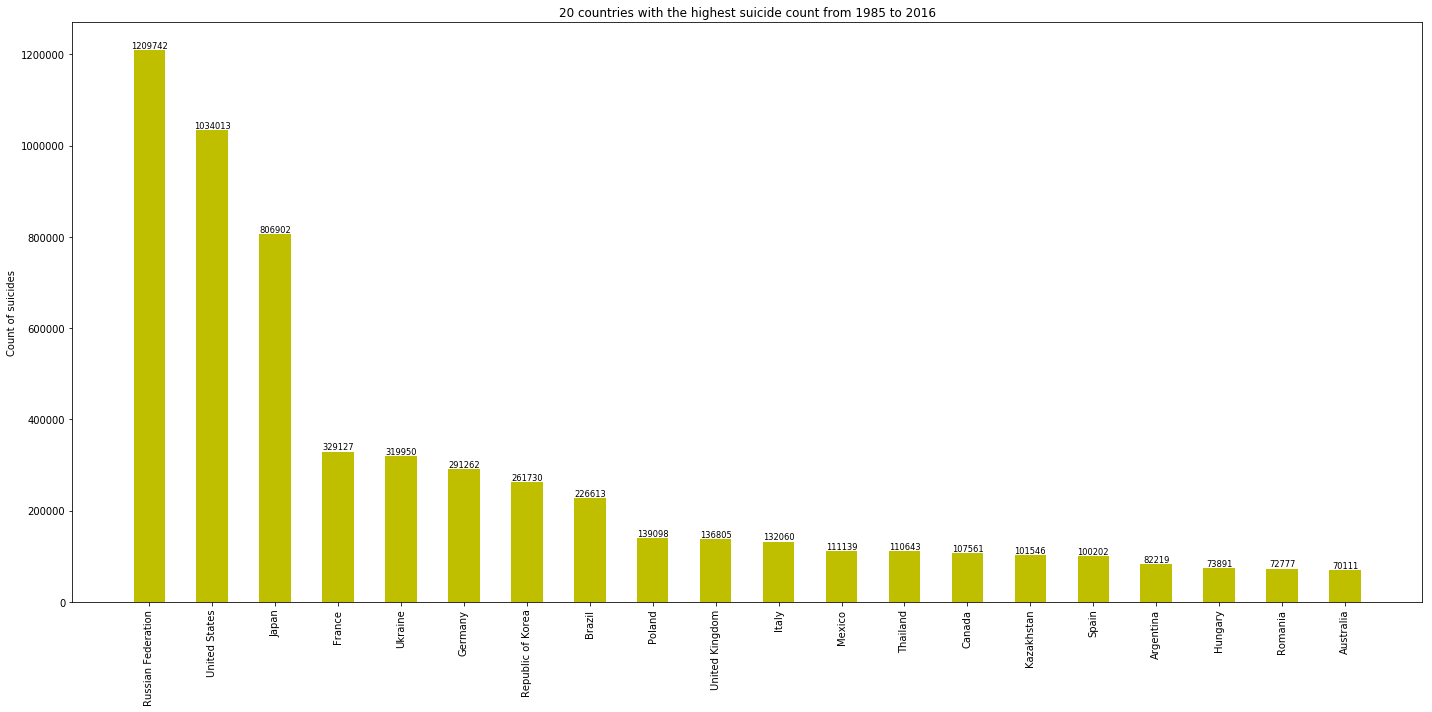

In [60]:
topN = 20 #change this number to see more countries, max =101
most_cont = suic_sum.head(topN)

xticks = np.array(most_cont.iloc[:,0])

heights = np.array(most_cont.iloc[:,1])

fig = plt.figure(figsize=(20,10))
plt.title('20 countries with the highest suicide count from 1985 to 2016')
plt.xticks(range(len(xticks)),xticks,rotation=90)
barChart = plt.bar(range(len(heights)),heights,width=0.5,align ='center',color='y')

plt.ylabel('Count of suicides')
plt.tight_layout()

#data text annotate
for rect in barChart:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom',size='small')



### so what about the top  20 countries with highest suicide rate through 1985 to 2016?

G:\anaconda3\envs\py3iaml\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


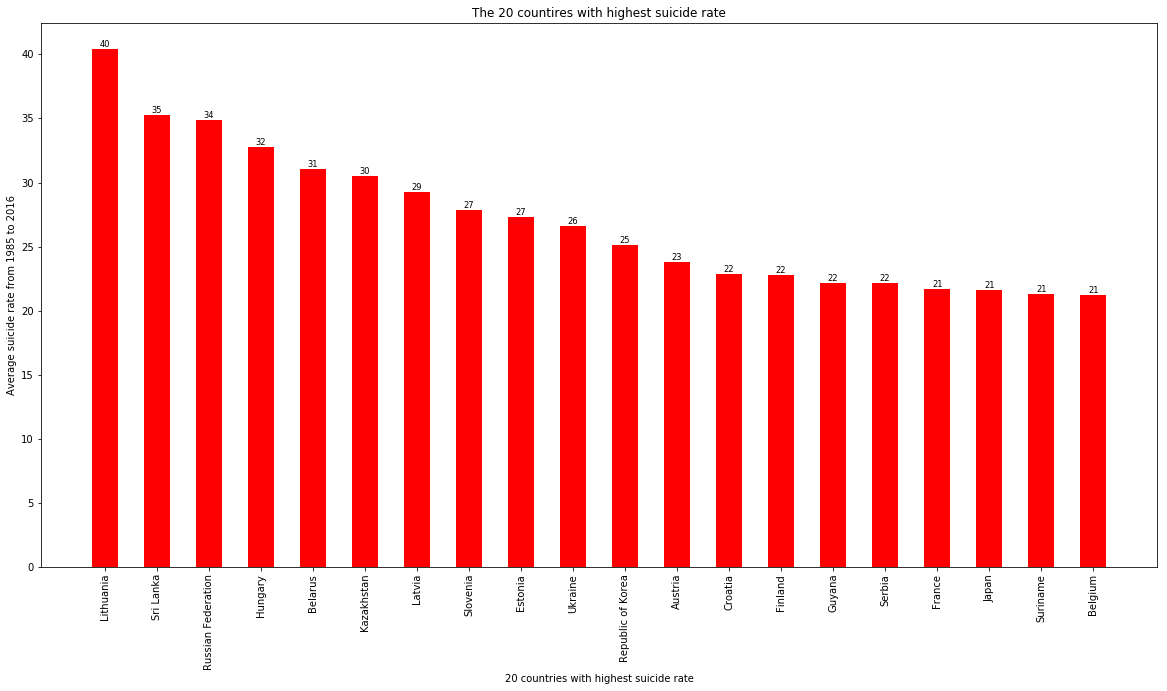

In [70]:
topN = 20;
suicide_rate = pd.DataFrame(data[['suicides/100k pop','gdp_per_capita ($)']].groupby(data['country']).mean())
suicide_rate = suicide_rate.reset_index().sort_index(by='suicides/100k pop',ascending=False)
highest_rate_countries = suicide_rate.iloc[0:topN,0]
highest_rate = suicide_rate.iloc[0:topN,1]

fig = plt.figure(figsize = (20,10))
plt.title('The 20 countires with highest suicide rate')
plt.xticks(range(topN),highest_rate_countries, rotation = 90)
bar_rate = plt.bar(range(topN),highest_rate,width=0.5,align = 'center', color = 'red')
plt.xlabel('20 countries with highest suicide rate')
plt.ylabel('Average suicide rate from 1985 to 2016')

for rect in bar_rate:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom',size='small')


## get start with the percentage of suicides in different countries from 1985 to 2016 ##

### see the percentage of suicides in the pie chart below ###

The total number of suicides all over the world from 1985 to 2016 is: 6748420


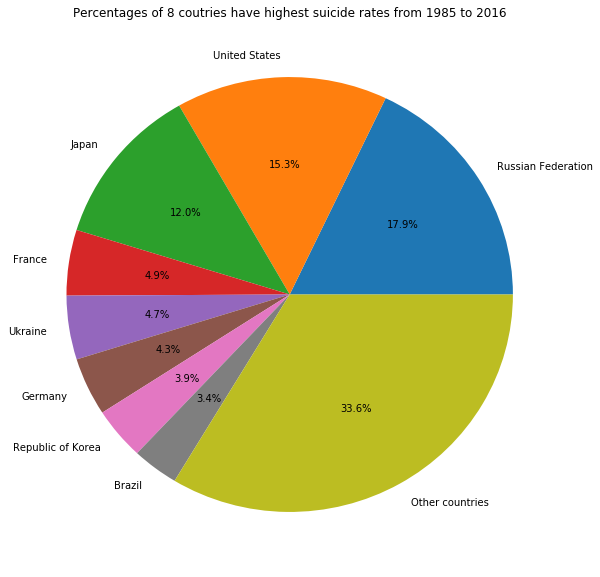

In [22]:
sectorNumber = 8 # change this number to see more countries, max 101
total_suicide_number = suic_sum.sum(1).sum()
print('The total number of suicides all over the world from 1985 to 2016 is:' ,total_suicide_number)
suic_percentage = suic_sum.iloc[:,1] / total_suicide_number 
most_cont_percentage = suic_percentage.iloc[0:sectorNumber]


sectorName = np.array(suic_sum.iloc[0:sectorNumber])[:,0]
sectorName = np.append(sectorName,'Other countries')
otherCountyPercentage = 1.0 - most_cont_percentage.sum()
most_cont_percentage = np.append(most_cont_percentage,otherCountyPercentage)
fig = plt.figure(figsize=(10,10))
plt.title('Percentages of 8 coutries have highest suicide rates from 1985 to 2016')
plt.pie(most_cont_percentage,labels=sectorName,autopct='%1.1f%%');




### Let's look at the average GDP per capita of each country from 1985 to 2016
let's look at the 20 coutries with highest GDP

In [23]:
topN = 20
GDP_data = data.groupby('country').mean()
GDP_data = GDP_data.reset_index().sort_values(by='gdp_per_capita ($)',ascending = False)
GDP_data.columns

Index(['country', 'year', 'suicides_no', 'population', 'suicides/100k pop',
       'HDI for year', 'gdp_per_capita ($)'],
      dtype='object')

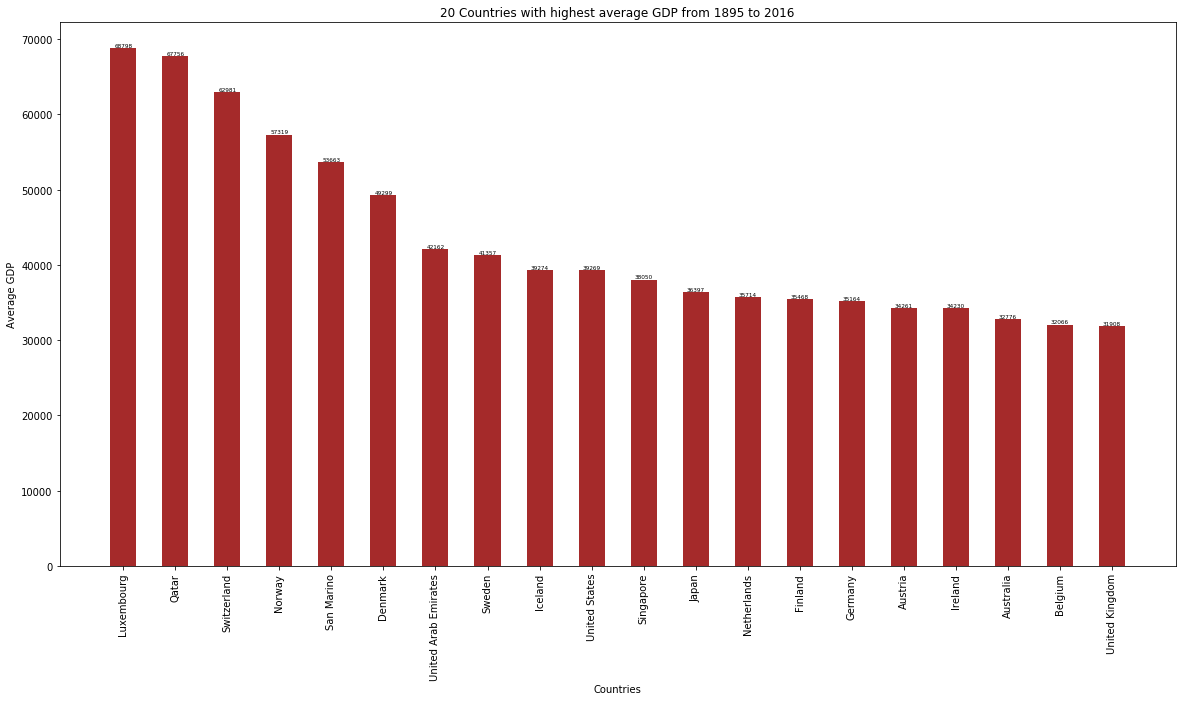

In [24]:
GDP_top = GDP_data[0:topN]
countries = np.array(GDP_top.loc[:,'country'])
mean_GDP = np.array(GDP_top.loc[:,'gdp_per_capita ($)'])

fig = plt.figure(figsize=(20,10));
plt.title('20 Countries with highest average GDP from 1895 to 2016')
plt.xticks(range(len(countries)),countries,rotation=90);
plt.xlabel('Countries')
plt.ylabel('Average GDP')
barGDP = plt.bar(countries,mean_GDP,color='brown',width=0.5)
#get text

for rect in barGDP:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom',size='xx-small')


### So what is the relationship between GDP_per_capita and suicide rate?
 check the top 20 countries with highest rate and the GDP condition of each of them

<BarContainer object of 20 artists>

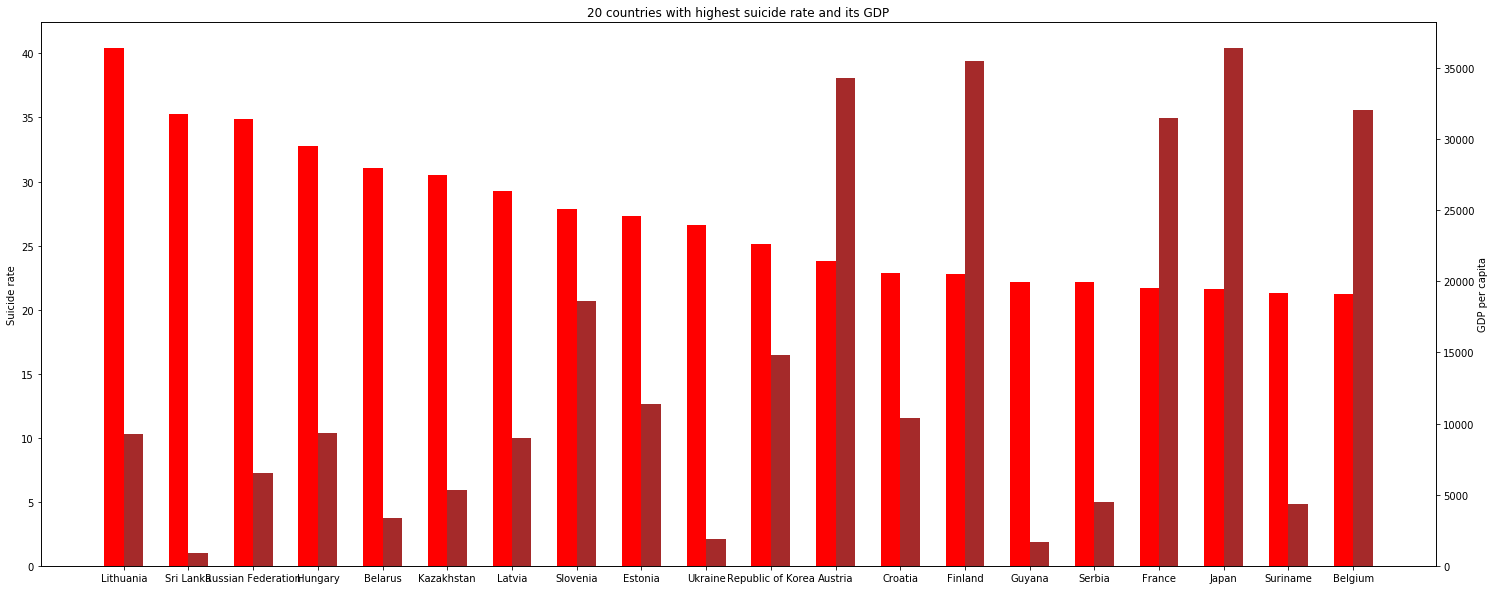

In [96]:
highest_rate_gdp = suicide_rate.iloc[0:topN,2]

fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
plt.xticks(range(topN),highest_rate_countries,rotation=180)
plt.title('20 countries with highest suicide rate and its GDP')
plt.xlabel('Countries')
ax1.set_ylabel('Suicide rate')
ax2.set_ylabel('GDP per capita')

width = 0.3
position1 = np.arange(topN) - width/2.0
position2 = position1 + width
ax1.bar(position1,highest_rate,width=width,color='r')
ax2.bar(position2,highest_rate_gdp,width=width,color='brown')

### There is no abvious relationship between gdp and suicide rate
Let's check the peason correlation betweeen the average suicide rate of each countries and the GDP_per_capita

In [98]:
suicide_rate.corr('pearson')

,suicides/100k pop,gdp_per_capita ($)
suicides/100k pop,1.000000,0.038206
gdp_per_capita ($),0.038206,1.000000


### we can find out that the pearson corelation is 0.038296 which is close to 0, so there is no linear relationship between them.
so what about other columns? let's check

In [99]:
data.corr('pearson')

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,1.000000,-0.004546,0.008850,-0.039037,0.366786,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.151399,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.102943,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.074279,0.001785
HDI for year,0.366786,0.151399,0.102943,0.074279,1.000000,0.771228
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,0.771228,1.000000


## From the table above, we find that the:
1. The pearson value of "suicide_no" and "population" is 0.616162, which is consistent to our intuitive that "more population, more suicides count"
2. The pearson value of "HDI for year" and "gdp_per_capita" 


In [104]:
HDIdata.loc[:,['country','HDI for year']]

,country,HDI for year
0,Albania,NaN
1,Albania,NaN
2,Albania,NaN
3,Albania,NaN
4,Albania,NaN
5,Albania,NaN
6,Albania,NaN
7,Albania,NaN
8,Albania,NaN
9,Albania,NaN


In [122]:
#select  data of Albania
#data.iloc[np.where(data['country'] == 'Albania')]

#select where HDI


In [123]:
data

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X
